#Energy Comparison of Controllers Used for Differential Drive Wheeled Mobile Robot

## Keywords
Differential Drive Robots, Energy Model, Fitness Function, Kinetic Energy, Robot’s Energy, Wheeled Mobile Robot Control.


## Introduction

Jupyter notebook is interactive media which includes text parts and code snippets. Those code could be run, just choose appropriate menu subitem in **Runtime** menu.

This Jupyter notebook was created to allow a comparison of different controllers. If you want to include your own controller you can go to the section **Controllers**, subsection **Define your controller here**.

If you want to use different paths you can define it in section **Simulation**, subsection **Paths Definition**.

It is also possible to tag experiment. In this case, visit section **Simulation** and subsection **Experiment Description**. Those tagged experiments could be selected in section **Simulations**, subsection **Execution**.

The last section is **Interactive Simulation** where you can choose different experiment sets on different paths. 




## Inevitable Program Initialization

In [ ]:
import numpy as np
import math
from math import *
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Robot Model

### Some different shapes of the Diffirential Drive Wheeled Mobile Robot 
2_wheel Diferential Drive Robot; 3_wheel Diferential Drive Robot; 4_wheel Diferential Drive Robot.

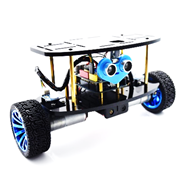 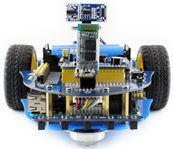  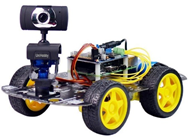


### Parameters
| Symbol | description |
| --- |---|
| $x$ | position on $x$ axis |
| $y$ | position on $y$ axis |
| $\theta$ | robot orientation
| $v_r$ | linear velocity of right wheel
| $v_l$ | linear velocity of left wheel
| $\omega_r$ | angular velocity of right wheel
| $\omega_l$ | angular velocity of left wheel
| $r$ | wheel's radius
| $b$ | distance between driven wheels

Table I

|Parameter|Symbol|Value|
|-|:-:|:-:|
|Wheel's radius|$r$|0.0925 $m$|
|Distance between driven wheels|$b$|0.37 $m$|
|Mass of the robot|$m$|9 $kg$|
|Moment of inertia of the robot|$I$|0.16245 $kgm^2$|
|Start position of the robot on x axis|$start_x$|0 $m$|
|Start position of the robot on y axis|$start_y$|0 $m$|
|Start orientation of the robot|$\theta$|45 $^o$|


In [ ]:
r = 0.0925
b = 0.37
m = 9  
I = 0.16245
start_x = 0
start_y = 0
start_theta =  45
start_theta = (start_theta * math.pi) / 180

### Basic equations
$v=\frac{v_r+v_l}{2}$ is linear velocity of the robot

$\Delta=\frac{v_r-v_l}{2} = \frac{\omega \cdot b}{2}$ is half of difference in circumferential velocities of its wheels

$R=\frac{v\cdot b}{2 \Delta}$ is radius of rotation for planned path

$\omega=\frac{2 \cdot \Delta}{b}$ is angular velocity of the robot

### Kinematic model of the Differential Drive Wheeled Mobile Robot

$\dot x=v \cdot \cos(\theta)$

$\dot y=v \cdot \sin(\theta)$

$\dot \theta=\omega$

also 
$\begin{bmatrix} \dot x \\ \dot y \\ \dot \omega \end{bmatrix} = \begin{bmatrix} cos(\theta) & 0 \\ sin(\theta) & 0 \\ 0 & 1 \end{bmatrix} . \begin{bmatrix} v \\ \omega \end{bmatrix} $

or 
$\begin{bmatrix} \dot x \\ \dot y \\ \dot \omega \end{bmatrix} =  f_r \left( \begin{bmatrix} v \\ \omega \end{bmatrix}\right) $

as 
$\begin{bmatrix} v \\ \omega \end{bmatrix}=f_c \left( \begin{bmatrix} x \\ y \\ \omega \end{bmatrix} \right)$

then
$\begin{bmatrix} \dot x \\ \dot y \\ \dot \omega \end{bmatrix} = f_r \left( f_c \left( \begin{bmatrix} x \\ y \\ \omega \end{bmatrix} \right) \right)$

and then
$\begin{bmatrix} \dot x \\ \dot y \\ \dot \omega \end{bmatrix} = f \left( \begin{bmatrix} x \\ y \\ \omega \end{bmatrix} \right)$

$f=f_r \circ f_c$

which is standard form of differential equation.

### Dynamic model  the Differential Drive Wheeled Mobile Robot
- In this subsection, the Kinematic model combine with the Motor Dynamic model of the robot is created.  
- DC motor constants

|Description|Symbol| Value and unit |
|-|-|-|
|Moment of Inertia of the rotor|$J$|0.01 $Kgm^2/s^2$|
|Damping ratio|$B$|0.1 $Nms$     |
|Electromotive force constant|$K$|0.01 $Nm/Amp$|
|Electrical Resistance|$Ra$|0.1 $\Omega$|
|Electrical Inductance|$La$|0.01 $H$|

Instead ``robot`` ``robotWithDynamic`` could be used. Parameters ``b1, b0, a1, a0`` define coefficients for motors. Motors are modelled as filters of 2nd order bellow:

Differential equation of a second order filter is

$\dot{x_0} = b_0 u + a_0 x_0 + x_1$

$\dot{x_1} =b_1 u + a_1 x_0 $

Therefore:

$\ddot{x_0} = b_0\dot{u} + a_0\dot{x_0} + b_1u + a_1x_0 $

or: 

$\ddot{y} - a_0\dot{y} - a_1y = b_0\dot{u} + b_1u$

So a transfer function for a filters of 2nd order is:

$F(s) = \frac{Y(s)}{U(s)} = \frac{b_0s + b_1}{s^2 - a_0s -a_1}$



### Robot model implementation
Function
```python
def robot
```
is prepared for future differential equation expression as could be expressed as $f_r$.


#### Kinematic model

In [ ]:
from math import sin, cos
def robot(t, currentState, controller):
  # ask controller for velocity and omega
  velocity, omega = controller(t, currentState)

  currentTheta = currentState[2]
  cosTheta = cos(currentTheta)
  sinTheta = sin(currentTheta)

  x_dot = velocity * cosTheta
  y_dot = velocity * sinTheta
  theta_dot = omega

  E = 0.5*(m*(velocity)*(velocity) + I*(omega)*(omega))

  return [x_dot, y_dot, theta_dot, velocity, omega, E] #velocity, omega, E are returned for easy evaluation they are not needed for computation

#### Dynamic Model


In [ ]:
#//////////////////////////////////////////////////////////////////////////////
# Calculating the coefficients for DC motor
J = 0.01
B = 0.1
Kt = Ke = K = 0.01
Ra = 0.1
La = 0.01
b1 = K/(La*J)
b0 = 0
a1 = -(Ra*B + K*K)/(La*J)
a0 = -(Ra*J + La*B)/(La*J)
#//////////////////////////////////////////////////////////////////////////////
def createFilter2ndOrder(b1, b0, a1, a0):
  def filter2ndOrder(t, u, currentState):
    x0 = currentState[0]
    x1 = currentState[1]
    dx0 = b0 * u + a0 * x0 + x1
    dx1 = b1 * u + a1 * x0
    return [dx0, dx1]
  return filter2ndOrder

def createRobotModelWithDynamic(b1, b0, a1, a0):
  motorAsFilter = createFilter2ndOrder(b1, b0, a1, a0)
  def robot(t, currentState, controller):
    # ask controller for velocity and omega
    velocity, omega = controller(t, currentState)
    
    delta = omega * b / 2
    vL = velocity - delta
    vR = velocity + delta
    vLState = currentState[6:8]
    vRState = currentState[8:10]
    vLStateD = motorAsFilter(t, vL, vLState)
    vRStateD = motorAsFilter(t, vR, vRState)
    vLFiltered = vLState[0]
    vRFiltered = vRState[0]

    velocity = (vRFiltered + vLFiltered) / 2
    delta = (vRFiltered - vLFiltered) / 2
    omega = 2 * delta / b

    currentTheta = currentState[2]
    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)

    x_dot = velocity * cosTheta
    y_dot = velocity * sinTheta
    theta_dot = omega

    E = 0.5*(m*(velocity)*(velocity) + I*(omega)*(omega))

    return [x_dot, y_dot, theta_dot, velocity, omega, E, *vLStateD, *vRStateD] #velocity, omega, E are returned for easy evaluation they are not needed for computation
  return robot
  
robotWithDynamic = createRobotModelWithDynamic(b1, b0, a1, a0)
robot = robotWithDynamic # If delete this line, only the Kinematic model is taken into account.

### Dynamic Model Test

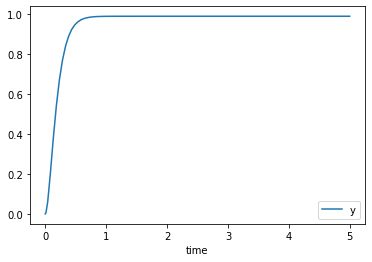

In [ ]:
filter2ndOrder = createFilter2ndOrder(b1, b0, a1, a0)
def compute(model, state0, t0 = 0.0, t_bound = 5, max_step = 0.05):
  solver = integrate.RK45(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)
  cnt = 0
  while True:
    message = solver.step()
    y = solver.y
    currentItem = {'time': solver.t, 'y': y[0], 'x1': y[1]}
    yield currentItem
    if (not(solver.status == 'running')):
        break
  return

filter2ndOrderStep = lambda t, state: filter2ndOrder(t, 1, state)
result = compute(filter2ndOrderStep, state0 = [0, 0])
df = pd.DataFrame(result)
df.plot.line('time', 'y')

## Simulation Tools

### Simulation / Computation
Function
```python
def compute
```
streams out (`yield`) the vector $r(t)$ which consists of

|index|name|symbol|unit|
|:-:|-|:-:|:-:|
|0|time|$t$|$s$|
|1|x position|$x$|$m$|
|2|y position|$y$|$m$|
|3|orientation|$\theta$|$rad$|
|4|distance|$s$|$m$|
|5|orientation II|$\theta$|$rad$|
|6||$\int E dt$||
|7|x velocity|$v_x$|$ms^{-1}$|
|8|y velocity|$v_y$|$ms^{-1}$|
|9|angular velocity|$\omega$|$rads^{-1}$|
|10|velocity|$v$|$ms^{-1}$|
|11|angular velocity II|$\omega$|$rads^{-1}$|
|12|current energy|$E$|$J$|
|13|total energy|$E$|$J$|

for numerical computation `RK45` function from `scipy` library is used.


In [ ]:
selectx = lambda item: item['y'][0]       # x position
selecty = lambda item: item['y'][1]       # y position
selectt = lambda item: item['time']       # time
selectv = lambda item: item['dy'][3]      # velocity
selectomega = lambda item: item['dy'][2]  # omega = theta_dot
selecte = lambda item: item['TotalEnergy']# energy
selects = lambda item: item['y'][3]       # displacement

selectors = [selectt, selectx, selecty, selects, selectv, selectomega, selecte]
#         yIndex=0, yIndex=1, yIndex=2, yIndex=3, yIndex=4, yIndex=5, yIndex=6
def compute(model, state0, t0 = 0.0, t_bound = 10, max_step = 0.05):
  solver = integrate.RK45(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)
  cnt = 0
  lastEnergy = 0
  totalEnergy = 0

#names = ['t', 'x', 'y', 'θ', 's', 'θ2', 'IE', "x'", "y'", 'ω', 'v', 'ω2', 'E']
  while True:
    message = solver.step()
    #currentItem = [solver.t, *solver.y, *model(solver.t, solver.y)]
    currentItem = {'time': solver.t, 'y': solver.y, 'dy': model(solver.t, solver.y)}
    #t, 'solver.y': x, y, theta, s, theta, intE 'model': x', y', theta', velocity, omega, E
    #0,             1, 2, 3,     4,   5,    6,           7,  8,   9,        10,     11,   12  
    # Energy calculation / energy sumation
    currentEnergy = currentItem['dy'][5] #currentNamed['E']
    deltaEnergy = currentEnergy - lastEnergy

    if deltaEnergy > 0:
      totalEnergy = totalEnergy + deltaEnergy

    lastEnergy = currentEnergy
    currentItem['TotalEnergy'] = totalEnergy

    yield currentItem
    if (not(solver.status == 'running')):
        break
  return

### Following given path
Function
```python
def controllerForPath
```
extends given controller which is supposed to reach the goal defined by a single position. Every time when the robot reaches the goal, a new point from the path is readout until the queue of the point is exhausted.

In [ ]:
def controllerForPath(controller, path):
  destinationX, destinationY, destinationOrietation = next(path)
  destinationState = [destinationX, destinationY, destinationOrietation]
  lastReached = False
  #print('Destination set to', destinationState)
  def result(t, currentState):
    nonlocal destinationX # use parent variable
    nonlocal destinationY # use parent variable
    nonlocal destinationState # use parent variable
    nonlocal lastReached # use parent variable

    currentX = currentState[0]
    currentY = currentState[1]
    deltaX = destinationX - currentX
    deltaY = destinationY - currentY
    if (lastReached == False):
      # last point in path was not reached
      if (deltaX * deltaX + deltaY * deltaY < 1e-2):
        # robot is close enought to currentDestination
        try:
          # try to get another point on path
          destinationX, destinationY, destinationOrietation = next(path)
          destinationState = [destinationX, destinationY, destinationOrietation]
          #print('Destination set to', destinationState, 'while in state', currentState)
        except StopIteration:
          # there are no other points
          lastReached = True
    if (lastReached):
      return (0, 0)
    else:
      return controller(t, currentState, destinationState)
  return result

### Robot Model and Controller Connection
Function
```python
def robotModelCreator
```
creates function$f(t, x)$ which is part of differential equation

$\dot x=f(t, x)$

returned `resultRMC` can be used and will be used as that function.

In [ ]:
def robotModelCreator(controllerCreator, path, **kwargs):
  controller_ = controllerCreator(**kwargs)
  savedController = controllerForPath(controller_, path)
  def resultRMC(t, currentState):
    return robot(t, currentState, savedController)
  return resultRMC

### Closure Function for Simulation
function
```python
def simpleCompute
```
returns function `resultSC` which has only one parameter and thus could be used simpler.

In [ ]:
def simpleCompute(computefunc, state0, t0 = 0, t_bound = 200, max_step = 0.05):
  def resultSC(model):
    return computefunc(
        model, state0 = state0, t0 = t0, t_bound = t_bound, max_step = max_step)
  return resultSC

### Simulation Runner
This function uses the simulation description parameter (`experimentsDescription`) and returns a 3D array of results. First dimension along robots, second dimension along time and last dimension along values.

In [ ]:
def runSimulations(
    experimentsDescription, path, 
    state0, t0 = 0, t_bound = 200, max_step = 0.05):

  solverfunc = simpleCompute(
      compute, state0 = state0, 
      t0 = t0, t_bound = t_bound, max_step = max_step)

  robots = []
  for currentExperiment in experimentsDescription:
    description = currentExperiment['description']
    robotWithController = robotModelCreator(**description)
    robots.append(solverfunc(robotWithController))

  results = []
  for currentRobot in robots:
    result = []
    for currentState in currentRobot: # readout all states from current moving robot
      for _ in selectors:
        result.append([])
      for index, func in enumerate(selectors):
        result[index].append(func(currentState))
    results.append(result)
  return results

### Path Plotter

In [ ]:
def plotSimulationsPaths(
    experimentsDescription, experimentsResults, path, show = True):
  for currentResult, experiment in zip(experimentsResults, experimentsDescription):
    currentStyle = experiment['plotstyle']

    t_a = currentResult[0]
    x_a = currentResult[1]
    y_a = currentResult[2]
        
    plt.plot(x_a, y_a, **currentStyle)

  pathx = []
  pathy = []
  for x, y, orientation in path:
    pathx.append(x)
    pathy.append(y)

  plt.plot(pathx, pathy, 'b-', label = 'Planned path', lw = 1)
  plt.grid(which = 'both')  
  plt.gca().set_aspect('equal')
  plt.legend(loc = 'best')
  plt.xlabel('$x[m]$')
  plt.ylabel('$y[m]$')
  if show:
    plt.show()    
  return

### Value Plotter

In [ ]:
def plotValueAndTime(
    experimentsDescription, experimentsResults, show = True, 
    xIndex = 0, xLabel = '$t[s]$',
    yIndex = 3, yLabel = '$s[m]$', title = ''):
  for currentResult, experiment in zip(experimentsResults, experimentsDescription):
    t_a = currentResult[xIndex]
    s_a = currentResult[yIndex]
    currentStyle = experiment['plotstyle']

    plt.plot(t_a, s_a, **currentStyle)

  plt.grid(which = 'both')  
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  plt.title(title)
  if show:
    plt.show()    
  return  

### All in one Plotter

In [ ]:
def plotAllInOne(experimentsDescription, experimentsResults, path):
  fig = plt.figure()# for save picture of figures

  plt.subplot(3, 2, 1)
  plt.title('Path')
  plotSimulationsPaths(
      experimentsDescription, experimentsResults, path, show = False)
  
  plt.subplot(3, 2, 2)
  plt.title('Distance in Time')
  plotValueAndTime(
      experimentsDescription, experimentsResults, show = False, 
      yIndex = 3, yLabel = '$s[m]$')
  plt.legend(loc = 'right')
  
  plt.subplot(3, 2, 3)
  plt.title('Angular velocity in Time')
  plotValueAndTime(
      experimentsDescription, experimentsResults, show = False, 
      yIndex = 5, yLabel = '$\omega[rads^{-1}]$')
  plt.legend(loc = 'lower right')
  
  plt.subplot(3, 2, 4)
  plt.title('Velocity in Time')
  plotValueAndTime(
      experimentsDescription, experimentsResults, show = False, 
      yIndex = 4, yLabel = '$v[ms^{-1}]$')
  plt.legend(loc = 'right')

  plt.subplot(3, 2, 5)
  plt.title('Total Kinetic Energy loss in Time')
  plotValueAndTime(
      experimentsDescription, experimentsResults, show = False, 
      yIndex = 6, yLabel = '$E[J]$')
  plt.legend(loc = 'right')
      
  fig.savefig('plot.png')
  plt.show()    


### Data Extractor


In [ ]:
def ExtractData(experimentsDescription, experimentsResults, path):
  for description, result in zip(experimentsDescription, experimentsResults):
#controllerCreator
    parameters = {**description['description']}
    del parameters['controllerCreator']
    del parameters['path']
    del parameters['omega_ri']

    yield {
        'Experiment': description['name'], 
        'Total distance': str(result[3][-1]), 
        'Total energy': str(result[6][-1]),
        **parameters
        }
  pass

### Table Display

In [ ]:
def displayTable(data):
  df = pd.DataFrame(data)
  display(df)

## Controllers
Some well-known control algorithms for the Differential Drive Wheeled Mobile Robot. Those controllers are implemented and compared

- Base on Lyapunov control  [13], [25]

- Clever Trigonometry Based Controller [23]

- Feedback base control – Circular path [12]

- Advanced controller By_RobinsMathew [1]

- Advanced controller - Circular path [12]

- Advanced controller - Dubins path [16]

- Controller proposed by Kanayama [1]

### Feedback-based controller for  circular path [12]
Describe it here, cite article

$v=\frac{v_r+v_l}{2}$

$\Delta=\frac{v_r-v_l}{2}$

$R=\frac{v b}{2 \Delta}$

$\omega=\frac{2 \Delta}{b}$

$\dot x=v \cdot cos(\theta)$

$\dot y=v \cdot sin(\theta)$

$\dot \theta=\omega$

$\omega=-2\cdot k_1\cdot v\cdot \frac{\Delta X\cdot sin(\theta) - \Delta Y\cdot cos(\theta)}{(\Delta X)^2 + (\Delta Y)^2}$

Where:

 $k_1 > 0$ : is a coefficient of controller.
 For this simulation we use $v = v_{ri}$ is reference linear velocity of the robot


In [ ]:
def createCircleControllerWithGain(omega_ri, vri, k1, 
  lowVelocityLimit, highVelocityLimit, lowOmegaLimit, highOmegaLimit):
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]

    destinationX = destinationState[0]
    destinationY = destinationState[1]

    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)

    deltaX = destinationX - currentX
    deltaY = destinationY - currentY

    velocity = vri
    omega = -2 * k1 * vri * (deltaX * sinTheta - deltaY * cosTheta) / (deltaX * deltaX + deltaY * deltaY)
    
    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit

    return velocity, omega
  return controller

### Advanced controller by RobinsMathew [1]

$$ \begin{pmatrix}
v_{ci} \\
\omega_{ci}  
\end{pmatrix} = 
\begin{pmatrix}
v_{ri}\cdot cos\theta_{ie}\\
\omega_{ri} + k_1\cdot v_{ri}\cdot T_{ie} + k_2\cdot v_{ri}\cdot sin\theta_{ie} 
\end{pmatrix} $$

Where:

$v_{ci}$ : is linear velocity of robot

$\omega_{ci}$ : is angular velocity of robot

$v_{ri}$ : is reference linear velocity of robot

$\omega_{ri}$ : is reference angular velocity of robot

$\theta_{ie}$ = $\theta_{wk} - \theta_i$ : 

$\theta_{ie} = \tan^{-1}(\frac{y_{wk}-y_i}{x_{wk}-x_i})$   

$\theta_i$ is the orientation of robot

$k_1, k_2 > 0$ : are control gains

$T_{ie} = sin\phi\cdot(x_i - x_{wk}) - cos\phi\cdot(y_i - y_{wk})$ : is cross-track error

$\phi = \tan^{-1}(\frac{y_{wk}-y_{wk-1}}{x_{wk}-x_{wk-1}})$ is defined as the angle made by the line
connecting current waypoint with the previous waypoint

$(x_i, y_i, \theta_i)$ : is current robot position

$(x_{wk}, y_{wk}, \theta_{wk})$ : is waypoint posture


In [ ]:
def createController_By_RobinsMathew(omega_ri, vri, k1, k2,
  lowVelocityLimit, highVelocityLimit, lowOmegaLimit, highOmegaLimit):
                                     
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]

    destinationX = destinationState[0]
    destinationY = destinationState[1]

    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)
    
    deltaX = destinationX - currentX
    deltaY = destinationY - currentY
    theta_destination = atan2(deltaY, deltaX)
    theta_error = theta_destination - currentTheta

    Te = math.sin(theta_destination)*deltaX - math.cos(theta_destination)*deltaY
    velocity = vri*math.cos(theta_error)
    omega = omega_ri + k1*vri*Te + k2*vri*math.sin(theta_error)

    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit
      
    return velocity, omega
  return controller

### Lyapunov controller [25]

$v = vri\cdot cos(\theta_{error})$

$\omega = k_1\cdot (\theta_{error}) + vri\cdot cos(\theta_{error})\cdot sin(\theta_{error})\cdot (\theta_{error}+k2\cdot \theta_{destination})/\theta_{error}$

Where:

$\Delta x = x_{destination} - x_i$

$\Delta y = y_{destination} - y_i$

$v$ : is linear velocity of robot

$\omega$ : is angular velocity of robot

$v_{ri}$ : is reference linear velocity of robot

$\omega_{ri}$ : is reference angular velocity of robot

$\theta_{error}$ = $\theta_{destination} - \theta$ 

$\theta_{deistination} = \tan^{-1}(\frac{y_{destination}-y_i}{x_{destination}-x_i})$   

$(x_i, y_i, \theta_i)$ : is current robot position

$k_1, k_2 > 0$ : are control gains


In [ ]:
def createLyapunovController(omega_ri, vri, k1, k2,
  lowVelocityLimit, highVelocityLimit, lowOmegaLimit, highOmegaLimit):
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]
    
    destinationX = destinationState[0]
    destinationY = destinationState[1]
    
    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)
    
    deltaX = destinationX - currentX
    deltaY = destinationY - currentY
    theta_destination = atan2(deltaY, deltaX)
    theta_error = theta_destination - currentTheta

    if (theta_error > pi):
      theta_error -= 2 * pi
    if (theta_error < -pi):
      theta_error += 2 * pi

    velocity = vri* math.cos(theta_error)
    omega = k1*theta_error + vri*math.sin(theta_error)*math.cos(theta_error)*(theta_error+k2*theta_destination)/theta_error
    
    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit
 
    return velocity, omega
  return controller

### Clever geometry controller [23]

$v = vri \cdot cos(\theta_{destination} - \theta_{current}))$

$\omega = (vri/l) \cdot sin(\theta_{destination} - \theta_{current})$

Where:

$v_{ri}$ : is reference linear velocity of robot

$\omega_{ri}$ : is reference angular velocity of robot

$\theta_{error}$ = $\theta_{destination} - \theta_i$ 

$\theta_{deistination} = \tan^{-1}(\frac{y_{destination}-y_i}{x_{destination}-x_i})$   

$(x_i, y_i, \theta_i)$ : is current robot position

$l > 0$ : is  control gains. In this controller $k1 = \frac{vri}{l}$



In [ ]:
def createCleverGeometryController(omega_ri, vri, k1,
  lowVelocityLimit, highVelocityLimit,lowOmegaLimit, highOmegaLimit):
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]
    
    destinationX = destinationState[0]
    destinationY = destinationState[1]
    
    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)
    
    deltaX = destinationX - currentX
    deltaY = destinationY - currentY
    theta_destination = atan2(deltaY, deltaX)
    theta_error = theta_destination - currentTheta

    if (theta_error > pi):
      theta_error -= 2 * pi
    if (theta_error < -pi):
      theta_error += 2 * pi

    velocity = vri *math.cos(theta_error)
    omega = k1 * math.sin(theta_error)

    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit
      
    return velocity, omega
  return controller

### Advanced controller - Dubins path [16]
Dubins curve consists of several circular segments and straight segments. The shortest Dubins curve consists of three circular segments and straight segments. The primary forms are: (RSL, LSL, RSR, LSR, RLR, LRL). Where L, R represent the circular turning to the left and right respectively, S represent the tangent connecting two turning circulars [16].

The Dubins Path-based controller is expressed as below:

`minimal_radius = k1` is minimal rotation radius of the robot

`angle_epsilon = 0.05` is small positive value of the angle 

$v_{ri}$ is linear reference velocity of the robot

` angle_delta = currentTheta - angle_to_destination`

- If `angle_delta < - angle_epsilon`, then controller is

> $v = v_{ri}$; 
$\omega = \frac {v}{k1}$

- If `angle_delta > + angle_epsilon`, then controller is

> $v = v_{ri}$; 
$\omega = \frac {-v}{k1}$

- If `angle_delta = angle_epsilon`, then controller is

> $v = v_{ri}$; 
$\omega = 0$

In [ ]:
def createDubinsController(omega_ri, vri, k1, lowVelocityLimit, highVelocityLimit,lowOmegaLimit, highOmegaLimit):
  minimal_radius = k1
  angle_epsilon = 0.05 # radians
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]
    
    # hacky, because it could be outside interval <-PI, +PI> :(
    while currentTheta < -2 * pi:
      currentTheta = currentTheta + 2 * pi
    while currentTheta > 2 * pi:
      currentTheta = currentTheta - 2 * pi

    destinationX = destinationState[0]
    destinationY = destinationState[1]

    deltaX = destinationX - currentX
    deltaY = destinationY - currentY

    angle_to_destination = atan2(deltaY, deltaX)

    #https://stackoverflow.com/questions/1878907/the-smallest-difference-between-2-angles

    angle_delta = currentTheta - angle_to_destination

    if (angle_delta > pi):
      angle_delta -= 2 * pi
    if (angle_delta < -pi):
      angle_delta += 2 * pi

    if (angle_delta < - angle_epsilon):
      # turn on minimal radius
      velocity = vri
      omega = velocity / minimal_radius
    elif (angle_delta > + angle_epsilon):
      # turn on minimal radius
      velocity = vri
      omega = -velocity / minimal_radius
    else:
      # go straight
      velocity = vri
      omega = 0

    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit

    return velocity, omega
  return controller

### Advanced controller by Kanayama Controller [1]

$$ \begin{pmatrix}
v_{ci} \\
\omega_{ci}  
\end{pmatrix} = 
\begin{pmatrix}
v_{ri}\cdot cos\theta_{ie} + k1\cdot x_{ie}\\
\omega_{ri} + k_2\cdot v_{ri}\cdot y_{ie} + k_3\cdot v_{ri}\cdot sin\theta_{ie} 
\end{pmatrix} $$

Where:

$v_{ci}$ : is linear velocity of robot

$\omega_{ci}$ : is angular velocity of robot

$v_{ri}$ : is reference linear velocity of robot

$\omega_{ri}$ : is reference angular velocity of robot

$\theta_{ie}$ = $\theta_{wk} - \theta_i$ : 

$\theta_{ie}$ = $\tan^{-1}(\frac{y_{wk}-y_i}{x_{wk}-x_i})$   

$\theta_i$ is the orientation of robot

$k_1, k_2, k_3$ : are control gains

$x_{ie} = cos\theta_i\cdot (x_{wk} - x_i) + sin\theta_i\cdot(y_{wk} - y_i)$ 

$y_{ie} = -sin\theta_i\cdot(x_{wk} - x_i) + cos\theta_i\cdot(y_{wk} - y_i)$ 

$(x_i, y_i, \theta_i)$ : is current robot position

$(x_{wk}, y_{wk}, \theta_{wk})$ : is waypoint posture


In [ ]:
def createController_By_Kanayama(omega_ri, vri, k1, k2, k3,
  lowVelocityLimit, highVelocityLimit, lowOmegaLimit, highOmegaLimit):
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]

    destinationX = destinationState[0]
    destinationY = destinationState[1]

    cosTheta = cos(currentTheta)
    sinTheta = sin(currentTheta)
    
    deltaX = destinationX - currentX
    deltaY = destinationY - currentY
    theta_destination = atan2(deltaY, deltaX)
    theta_error = theta_destination - currentTheta

    x_ie = cosTheta*deltaX + sinTheta*deltaY
    y_ie = cosTheta*deltaY - sinTheta*deltaX
    velocity = vri*math.cos(theta_error) + k1*x_ie
    omega = omega_ri + k2*vri*y_ie + k3*vri*math.sin(theta_error)

    if velocity > highVelocityLimit:
      velocity = highVelocityLimit
    if (velocity < lowVelocityLimit):
      velocity = lowVelocityLimit
    if omega > highOmegaLimit:
      omega = highOmegaLimit
    if (omega < lowOmegaLimit):
      omega = lowOmegaLimit
          
    return velocity, omega
  return controller

### Define your controller here

In [ ]:
def createAnotherController(paramA, paramB, paramC):#sd
  def controller(t, currentState, destinationState):
    currentX = currentState[0]
    currentY = currentState[1]
    currentTheta = currentState[2]

    #calulcate velocity and omega on your own
    velocity = 1
    omega = 0

    return velocity, omega
  return controller

## Simulation

### Paths Definition

In [ ]:
# Square path
def pathA():
  yield 0, 0, 0  #X, Y, orientation
  yield 10, 0, 0 #X, Y, orientation
  yield 10, 10, 0#X, Y, orientation
  yield 0, 10, 0 #X, Y, orientation
  yield 0, 0, 0 #X, Y, orientation

In [ ]:
# StraightFoward path
def pathB():
  yield 0, 0, 0 #X, Y, orientation
  yield 10, 0, 0 #X, Y, orientation
  yield 20, 10, 0 #X, Y, orientation
  yield 30, 10, 0 #X, Y, orientation
  yield 25, 20, 0 #X, Y, orientation

In [ ]:
# StraightFoward path with many waypoint
def pathC():
  yield 0, 0, 0 #X, Y, orientation
  x1 = 3
  for x1 in range (3,10):
    yield x1, 0, 0
    x1 = x1 + 1
  yield 10, 0, 0 #X, Y, orientation
  x2 = 12
  y2 = 2
  for x2 in range (12,20):
    yield x2, y2, 0
    x2 = x2 + 1
    y2 = y2 + 1
  yield 20, 10, 0 #X, Y, orientation
  x3 = 24
  for x3 in range(24, 30):
    yield x3, 10, 0
    x3 = x3+1
  yield 30, 10, 0 #X, Y, orientation
  yield 27.5, 15, 0
  yield 26.5, 17, 0
  yield 25.5, 19, 0
  yield 25, 20, 0 #X, Y, orientation

In [ ]:
# Diamond-Shape path
def pathD():
  yield 0, 0, 0 #X, Y, orientation
  yield 10, -5, 0 #X, Y, orientation
  yield 20, 0, 0 #X, Y, orientation
  yield 10, 5, 0 #X, Y, orientation
  yield 0, 0, 0 #X, Y, orientation

In [ ]:
# Sharp turn path
def pathE():
  yield 0, 0, 0 #X, Y, orientation
  yield 0, 5, 0 #X, Y, orientation
  yield 5, 0, 0 #X, Y, orientation
  yield 5, 10, 0 #X, Y, orientation
  yield 25, 0, 0 #X, Y, orientation

### Define your path here

In [ ]:
def pathF():
  #for every single point on path express
  yield 0, 0, 0 #X, Y, orientation
  #repeat it until done
  

In [ ]:
paths = [ 
  {'name': 'Square path', 'func': pathA, 
   'tags' :['Square path', 'Main']},
  {'name': 'Straightforward path', 'func': pathB, 
   'tags' :['Straightforward path', 'Main', 'Supportive']},
  {'name': 'Straightforward path with many waypoints', 'func': pathC, 
   'tags': ['Straightforward path with many waypoints','Main', 'Supportive']},
  {'name': 'Diamond-Shape path', 'func': pathD, 
   'tags': ['Diamond-Shape path','Main']},
  {'name': 'Sharp turn path', 'func': pathE, 
   'tags': ['Sharp turn path','Main']},
  {'name': 'Custom', 'func': pathF, 'tags': ['Custom']} 
   ]

### Experiment Description

In [ ]:
experiments = [
    { 'name': 'Circle [v = 1.0, g = 4]',
      'description':
        {'controllerCreator': createCircleControllerWithGain, 
        'omega_ri': 0,'vri': 1.0, 'k1': 4.0
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'g', 'lw': 1,
        'label': 'Feedback-based controller $G = 4$'
        },      
      'tags': ['Main', 'Circle', 'Low Energy']
    },
    { 'name': 'Circle_2nd [v = 0.8, g = 4]',
      'description':
        {'controllerCreator': createCircleControllerWithGain, 
        'omega_ri': 0,'vri': 0.8, 'k1': 4.0,
        'highVelocityLimit': 0.8
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'r', 'lw': 1,
        'label': 'Feedback-based controller 2nd $G = 4$'
        },      
      'tags': ['Circle']
    },
    { 'name': 'Circle_3rd [v = 0.5, g = 4]',
      'description':
        {'controllerCreator': createCircleControllerWithGain, 
        'omega_ri': 0,'vri': 0.5, 'k1': 4.0,
        'highVelocityLimit': 0.5
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'k', 'lw': 1,
        'label': 'Feedback-based controller 3rd $G = 4$'
        },      
      'tags': ['Circle']
    },
    { 'name': 'Circle [v = 1.0, g = 8]',
      'description':
        {'controllerCreator': createCircleControllerWithGain, 
        'omega_ri': 0,'vri': 1.0, 'k1': 8.0,
        },
      'plotstyle':
        {'linestyle': '--', 'color': 'g', 'lw': 1,
        'label': 'Feedback-based controller $G = 8$'
        },
      'tags': ['Main', 'Low Energy']
    },
    { 'name': 'Dubins',
      'description':
        {'controllerCreator': createDubinsController, 
        'omega_ri': 0, 'vri': 1.0, 'k1': 1.0,
        },
      'plotstyle':
        {'linestyle': '--', 'color': 'maroon', 'lw': 1, 
        'label': 'Dubins-based controller'
        },
      'tags': ['Main', 'Dubins', 'Low Energy']    
    },
    
    { 'name': 'Dubins_2nd',
      'description':
        {'controllerCreator': createDubinsController, 
        'omega_ri': 0, 'vri': 1.1, 'k1': 1.0,
        'highVelocityLimit': 1.1
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'g', 'lw': 1, 
        'label': 'Dubins-based controller 2nd'
        },
      'tags': ['Dubins']     
    },
    { 'name': 'Dubins_3rd',
      'description':
        {'controllerCreator': createDubinsController, 
        'omega_ri': 0, 'vri': 1.15, 'k1': 1.0,
        'highVelocityLimit': 1.15
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'r', 'lw': 1, 
        'label': 'Dubins-based controller 3rd'
        },
      'tags': ['Dubins']     
    },
    { 'name': 'Lyapunov',
      'description':
        {'controllerCreator': createLyapunovController, 
        'omega_ri': 0,'vri': 1.0, 'k1': 5.0, 'k2': 0.01,
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'r', 'lw': 1,
        'label': 'Lyapunov-based controller'
        },
      'tags': ['Main', 'Lyapunov', 'High Energy']
    },    
    { 'name': 'Lyapunov 2nd',
      'description':
        {'controllerCreator': createLyapunovController, 
        'omega_ri': 0,'vri': 1.1, 'k1': 5.0, 'k2': 0.01,
        'highVelocityLimit': 1.1
        },
      'plotstyle':
        {'linestyle': '--', 'color': 'g', 'lw': 1,
        'label': 'Lyapunov-based controller vri = 1.1 m/s'
        },
      'tags': ['Lyapunov']
    },
    { 'name': 'Lyapunov 3rd',
      'description':
        {'controllerCreator': createLyapunovController, 
        'omega_ri': 0,'vri': 1.15, 'k1': 5.0, 'k2': 0.01,
        'highVelocityLimit': 1.15
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'indigo', 'lw': 1,
        'label': 'Lyapunov-based controller vri = 1.15 m/s'
        },
      'tags': ['Lyapunov']
    },

    { 'name': 'Geometry',
      'description':
        {'controllerCreator': createCleverGeometryController, 
        'omega_ri': 0,'vri': 1.0, 'k1': 7.0,
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'indigo', 'lw': 1,
        'label': 'Geometry-based controller'
        },
      'tags': ['Main', 'High Energy']
    },
    { 'name': 'RobinsMathew',
      'description':
        {'controllerCreator': createController_By_RobinsMathew, 
        'omega_ri':0, 'vri': 1.0, 'k1': 1.5, 'k2': 6.5,
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'k', 'lw': 1, 
        'label': 'RobinsMathew-based controller'
        },
      'tags': ['Main', 'RobinsMathew', 'High Energy']    
    },

    { 'name': 'RobinsMathew 2nd',
      'description':
        {'controllerCreator': createController_By_RobinsMathew, 
        'omega_ri':0, 'vri': 1.1, 'k1': 1.5, 'k2': 6.5,
        'highVelocityLimit': 1.1
        },
      'plotstyle':
        {'linestyle': '-', 'color': 'r', 'lw': 1, 
        'label': 'RobinsMathew-based controller 2nd'
        },
      'tags': ['RobinsMathew']    
    },

    { 'name': 'RobinsMathew 3rd',
      'description':
        {'controllerCreator': createController_By_RobinsMathew, 
        'omega_ri':0, 'vri': 1.15, 'k1': 1.5, 'k2': 6.5,
        'highVelocityLimit': 1.15
        },
      'plotstyle':
        {'linestyle': '--', 'color': 'g', 'lw': 1, 
        'label': 'RobinsMathew-based controller 3rd'
        },
      'tags': ['RobinsMathew']    
    },
    
    { 'name': 'Kanayama',
      'description':
        {'controllerCreator': createController_By_Kanayama, 
        'omega_ri':0, 'vri': 1.0, 'k1': 0.001, 'k2': 0.1, 'k3': 5,
        },
      'plotstyle':
        {'linestyle': '--', 'color': 'k', 'lw': 1, 
        'label': 'Kanayama-based controller'
        },
      'tags': ['Main', 'High Energy']
    }
    #insert you new controller here
    ]

In [ ]:
def ApplyExperimentsOnPath(path, experiments = experiments,
  #shared limits on velicities and omegas
  slVelocityLow = 0.2,
  slVelocityHigh = 1.0,
  slOmegaLow = -0.75,
  slOmegaHigh = 0.75):

  #MovementLimits could be redefined in controllers description
  MovementLimits = {'lowVelocityLimit': slVelocityLow, 
    'highVelocityLimit': slVelocityHigh, 
    'lowOmegaLimit': slOmegaLow, 
    'highOmegaLimit': slOmegaHigh}

  result = []
  for item in experiments:
    newExperiment = {
        'name': item['name'],
        'description': {**MovementLimits, **item['description'], 'path': path()},
        'plotstyle': {**item['plotstyle']},
        'tags': item['tags']
    }
    result.append(newExperiment)

  return result

### Execution

In [ ]:

#just those paths which tags attribute cointains tagValuePaths will be used for experiments
tagValuePaths = 'main'
selectedPaths = list(filter(lambda item: tagValuePaths in item['tags'], paths))
#just those described experiment which contains inside tags tagValue will be executed
tagValue = 'Main' #main experiment, 
selectedExperimentsDescription = list(filter(lambda item: tagValue in item['tags'], experiments))

def executeSelectedExperiments(
    experimentsDescription = selectedExperimentsDescription,
    paths = selectedPaths):
  allResults = [] #storage for all experiments

  for pathDesc in paths: # for all paths
    currentPath = pathDesc['func'] 
    experiments = ApplyExperimentsOnPath(
        path = currentPath, 
        experiments = experimentsDescription) # create experiments for currentPath

    p0 = None
    if robot == robotWithDynamic:
      p0 = np.array([start_x, start_y, start_theta, 0, 0, 0, 0, 0, 0, 0]) # x0=0, y0=0, theta
    else:
      p0 = np.array([start_x, start_y, start_theta, 0, 0, 0]) # x0=0, y0=0,theta

    #execute all experiments
    results = runSimulations(
      experimentsDescription = experiments, path = currentPath(),
      state0 = p0, t0 = 0, t_bound = 100, max_step = 0.05) 
    
    #retrieve text values from experiments
    text = list(ExtractData(experimentsDescription = experiments, 
                            experimentsResults = results, path = currentPath()))   
    
    #store experiments results
    allResults.append({
        'pathDesc': pathDesc,
        'description': experimentsDescription,
        'results': results,
        'texts': text})
  return allResults
  
allResults = executeSelectedExperiments(
    selectedExperimentsDescription, selectedPaths)

## Simulation results

### Simulation text results

In [ ]:
def textOutput(allResults):
  for item in allResults:
    pathDesc = item['pathDesc']
    #experimentsDescription = item['description']
    #results = item['results']  
    text = item['texts']

    print('*' * 30)
    print('*', 'Path name:', pathDesc['name'])
    print('*' * 30)
    displayTable(text)
    
textOutput(allResults)

### Simulation image output size settings

In [ ]:
smallImages = False
if smallImages:
  plt.rcParams["font.size"] = "10"
  plt.rcParams["figure.figsize"] = (15, 10)
else:
  plt.rcParams["font.size"] = "18"
  plt.rcParams["figure.figsize"] = (25, 24)

### Simulation all visualizations

In [ ]:
def allVisualizations(allResults):
  for item in allResults:
    #path = item['path']
    pathDesc = item['pathDesc']
    experimentsDescription = item['description']
    results = item['results']  
    #text = item['texts']
    plotAllInOne(
      experimentsDescription = experimentsDescription,
      experimentsResults = results, 
      path = pathDesc['func']())
  
allVisualizations(allResults)

### Simulation paths visualizations

In [ ]:
def pathVisualizations(allResults):
  for item in allResults:
    #path = item['path']
    pathDesc = item['pathDesc']
    experimentsDescription = item['description']
    results = item['results']  
    #text = item['texts']
    plotSimulationsPaths(
      experimentsDescription = experimentsDescription,
      experimentsResults = results, 
      path = pathDesc['func']())
    
pathVisualizations(allResults)

### Simulation robot distance in time visualization

In [ ]:
def distanceVisualization(allResults):
  for item in allResults:
    #path = item['path']
    #pathDesc = item['pathDesc']
    experimentsDescription = item['description']
    results = item['results']  
    #text = item['texts']
    plotValueAndTime(
        experimentsDescription = experimentsDescription, 
        experimentsResults = results)

distanceVisualization(allResults)    

### Simulation robot energy in time visualization

In [ ]:
def energyVisualization(allResults):
  for item in allResults:
    #path = item['path']
    #pathDesc = item['pathDesc']
    experimentsDescription = item['description']
    results = item['results']  
    #text = item['texts']
    plotValueAndTime(
      experimentsDescription = experimentsDescription, 
      experimentsResults = results, yIndex = 6, yLabel = '$E[J]$')
    
energyVisualization(allResults)    

## Interactive Simulation

In [ ]:
from ipywidgets import interact

exTags = []
for item in experiments:
  for tag in item['tags']:
    if not tag in exTags:
      exTags.append(tag)

pathTags = []
for item in paths:
  for tag in item['tags']:
    if not tag in pathTags:
      pathTags.append(tag)

visualizations = {
    'text': textOutput,
    'all': allVisualizations,
    'path': pathVisualizations,
    'distance': distanceVisualization,
    'energy': energyVisualization,
}

oldpathTag = None
oldexperimTag = None

def runIt(experimTag, pathTag, visualizations, smallImages):
  global oldpathTag
  global oldexperimTag
  global allResults

  if smallImages:
    plt.rcParams["font.size"] = "15"
    plt.rcParams["figure.figsize"] = (22, 22)
  else:
    plt.rcParams["font.size"] = "20"
    plt.rcParams["figure.figsize"] = (35, 35)

  if not((experimTag == oldexperimTag) & (pathTag == oldpathTag)):
    print('Simulating, please be patient')

    # select appropriate paths
    selectedPaths = list(filter(lambda item: pathTag in item['tags'], paths))
    # select appropriate experiments
    selectedExperimentsDescription = list(filter(lambda item: experimTag in item['tags'], experiments))

    # collect results
    allResults = executeSelectedExperiments(
        selectedExperimentsDescription, selectedPaths)
    
  visualizations(allResults)
  oldpathTag = pathTag
  oldexperimTag = experimTag

interact(runIt,  
         experimTag=exTags,
         pathTag=pathTags,
         visualizations=visualizations, smallImages=True)

interactive(children=(Dropdown(description='experimTag', options=('Main', 'Circle', 'Low Energy', 'Dubins', 'L…

<function __main__.runIt>

## References
[1]	R. Mathew and S. S. Hiremath, “Development of Waypoint Tracking Controller for Differential Drive Mobile Robot,” in International Conference on Control, Decision and Information Technologies (CoDIT), Paris, France, 2019, pp. 1121-1126.

[2]	X. Zhou, B. Ma and L. Yan, “Adaptive Output Feedback Tracking Controller for Wheeled Mobile Robots with Unmeasurable Orientation,” in Chinese Control Conference (CCC), Wuhan, 2018, pp. 412-417.

[3]	M. Yallala and S. J. Mija, “Path tracking of differential drive mobile robot using two step feedback linearization based on backstepping,” in International Conference on Innovations in Control, Communication and Information Systems (ICICCI), Greater Noida, India, 2017, pp.1-6.

[4]	N. V. Tinh, N. T. Linh, P. T. Cat, P. M. Tuan, M. N. Anh and N. P. T. Anh, “Modeling and feedback linearization control of a nonholonomic wheeled mobile robot with longitudinal, lateral slips,” in IEEE International Conference on Automation Science and Engineering (CASE), Fort Worth, TX, 2016, pp. 996-1001.

[5]	D. Diaz and R. Kelly, “On modeling and position tracking control of the generalized differential driven wheeled mobile robot,” in IEEE International Conference on Automatica (ICA-ACCA), Curico, 2016, pp. 1-6.

[6]	J. Meng, A. Liu, Y. Yang, Z. Wu and Q. Xu, “Two-Wheeled Robot Platform Based on PID Control,” in International Conference on Information Science and Control Engineering (ICISCE), Zhengzhou, 2018, pp. 1011-1014.

[7]	S. Peng and W. Shi, “Adaptive Fuzzy Output Feedback Control of a Nonholonomic Wheeled Mobile Robot,” in IEEE Access, 2018, pp. 43414-43424.

[8]	Y. Jinhua, Y. Suzhen and J. Xiao, “Trajectory Tracking Control of WMR Based on Sliding Mode Disturbance Observer with Unknown Skidding and Slipping,” in International Conference on Cybernetics, Robotics and Control (CRC), Chengdu, 2017, pp. 18-22.

[9]	F. G. R. Contreras, A. I. C. Lopez, L. Fridman and V. J. G. Villela, “Trajectory tracking using continuous sliding mode algorithms for differential drive robots ,” in IEEE Annual Conference on Decision and control (CDC), Melbourne, Australia, 2017, pp. 6027-6032.

[10]	B. B. Mevo, M. R. Saad and R. Fareh, “Adaptive Sliding Mode Control of Wheeled Mobile Robot with Nonlinear Model and Uncertainties,” in  IEEE Canadian Conference on Electrical & Computer Engineering (CCECE), Quebec City, QC, 2018, pp. 1-5.

[11]	P. Petrov and V. Georgieva, “Adaptive Velocity Control for a Differential Drive Mobile Robot,” in International Symposium on Electrical Apparatus and Technologies (SIELA), Bourgas, 2018, pp. 1-4.

[12]	Štefek A., Křivánek V., Bergeon Y.T., Motsch J, “Differential Drive Robot: Spline-Based Design of Circular Path”. In: Awrejcewicz J. (eds) Dynamical Systems: Theoretical and Experimental Analysis. Springer Proceedings in Mathematics & Statistics, vol 182. Springer, Cham, 2016, pp 331-342.

[13]	Spyros G. Tzafestas, “Introduction to Mobile Robot Control,” in Elsevier, 1st ed., 2014, pp. 159–169.

[14]	A L. Nelsona, G J. Barlowb, L. Doitsidisc, “Fitness functions in evolutionary robotics: A survey and analysis,” Journal of Robotics and Autonomous Systems, vol.57, issue 4: pp. 345-370, April. 2009. DOI: https://doi.org/10.1016/j.robot.2008.09.009

[15]	R. L. S. Sousa, M. D. do Nascimento Forte, F. G. Nogueira and B. C. Torrico, “Trajectory tracking control of a nonholonomic mobile robot with differential drive,” in IEEE Biennial Congress of Argentina (ARGENCON), Buenos Aires, Argentina, 2016, pp. 1-6.

[16]	B. Shi, Y. Su, C. Wang, L. Wan and Y. Qi, “Recovery Path Planning Algorithm Based on Dubins Curve for Autonomous Underwater Vehicle,” in IEEE 8th International Conference on Underwater System Technology: Theory and Applications (USYS), Wuhan, China, 2018, pp. 1-5.

[17]	M. Begnini, D. W. Bertol, N. A. Martinsa, “A robust adaptive fuzzy variable structure tracking control for the wheeled mobile robot: Simulation and experimental results,” ELSEVIER J. Control Engineering Practice, vol. 64, pp. 27-43, July. 2017. DOI: https://doi.org/10.1016/j.conengprac.2017.04.006. 

[18]	S. Peng and W. Shi, “Adaptive Fuzzy Output Feedback Control of a Nonholonomic Wheeled Mobile Robot,” IEEE J. Control Engineering Practice, vol. 64, pp. 27-43, Aug. 2018. DOI: 10.1109/ACCESS.2018.2862163.

[19]	M. Yue, L. Wang, and T. Ma, “Neural Network Based Terminal Sliding Mode Control for WMRs Affected by an Augmented Ground Friction With Slippage Effect,” J. of Automatica, vol. 4, pp. 498 - 506, July. 2017.

[20]	H. Yang, X. Fan, P. Shi and C. Hua, “Nonlinear Control for Tracking and Obstacle Avoidance of a Wheeled Mobile Robot With Nonholonomic Constraint,” IEEE J. Transactions on Control Systems Technology, vol. 24, no. 2, pp. 741-746, March. 2016. DOI: 10.1109/TCST.2015.2457877.

[21]	L. Xin, Q. Wang, J. She, Y. Li, “Robust adaptive tracking control of wheeled mobile robot,” ELSEVIER J. Robotics and Autonomous Systems, vol. 78, pp. 36-48, April. 2016. DOI: https://doi.org/10.1016/j.robot.2016.01.002. 

[22]	M. Wahab, F. R. Gutierrez, A. E. Shahat “Energy Modeling of Differential Drive Robots,” in IEEE SoutheastCon, Florida, 2015, pp. 1-6.

[23]	S. Armah, S. Yi and T. A. Lebdeh, “Implementation of autonomous navigation algorithms on two-wheeled ground mobile robot,” American J. Engineering and Applied Sciences, vol. 78, pp. 36-48, April. 2016. DOI: 10.3844/ajeassp.2014.149.164.

[24]	L. A. Yekimi, A. D. Isa “Fuzzy Logic Control of Goal-Seeking 2-Wheel Differential Mobile Robot Using Unicycle Approach,” in IEEE International Conference on Automatic Control and Intelligent Systems (I2CACIS 2019), Selangor, Malaysia, 2019, pp. 300-304.

[25]	P. Xinzhe, L. Zhiyuan, P. Run and C. Hong, “Practical stabilization of wheeled mobile robots based on control Lyapunov function,” in IEEE Proceedings of the International Conference on Control Applications, Glasgow, UK, 2002, pp. 345-349 vol.1.

[26]	H. Chitsaz, S. M. LaValle, D. J. Balkcom and M. T. Mason, “Minimum wheel-rotation paths for differential-drive mobile robots,” in IEEE International Conference on Robotics and Automation, Orlando, Florida, 2006, pp. 1616-1623.

[27]	X. Song and S. Hu, “2D path planning with dubins-path-based A∗ algorithm for a fixed-wing UAV,” in IEEE IEEE International Conference on Control Science and Systems Engineering (ICCSSE), Beijing, 2017, pp. 69-73.

[28]	Elbanhawi, M., Simic, M. & Jazar, R.N, “Continuous Path Smoothing for Car-Like Robots Using B-Spline Curves,” J Intell Robot Syst 80, pp. 23–56, Jan. 2015. DOI: https://doi.org/10.1007/s10846-014-0172-0.

[29]	S. Liu and D. Sun, “Minimizing Energy Consumption of Wheeled Mobile Robots via Optimal Motion Planning,” Journal of IEEE/ASME Transactions on Mechatronics, vol. 19, no. 2, pp. 401-411, April 2014. DOI: 10.1109/TMECH.2013.2241777.

[30]	P. B. Deb, O. Saha, S. Saha, S. Paul, “Dynamic Model Analysis of a DC Motor in MATLAB,” Journal of Scientific & Engineering Research, vol. 8, no. 2, ISSN 2229-5518. pp. 57-60, March 2017.
